# Load data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import pandas as pd
import re
import torch

import monai
from monai.data import DataLoader, Dataset
from monai.data.utils import pad_list_data_collate 
from monai.utils import first
from monai.transforms import ToTensord, AddChanneld, Compose, LoadImaged

In [2]:
# root_dir = r'D:\Jonathan\T1-T2-results\data_processed\sub-amu01\anat'
# img_filename = 'sub-amu01_T1w.nii' 
# seg_filename = 'sub-amu01_T1w_RPI_r_seg_labeled.nii'
# fn_key = ('img', 'seg') # Filename keys for image and seg files

# path = os.path.join(root_dir, img_filename + '.gz')

# trans = Compose([LoadImage(image_only=True)])

# img = trans(path)
# plt.imshow(img[50])

In [17]:
root_dir = r'D:\Jonathan\2. Projects\Fov Detection\SpineGen_T1-T2-results\data_processed'

fn_keys = ('img', 'label') # Filename keys for image and seg files

In [4]:
# import re

# img_filenames = []
# seg_filenames = []
# lab_filenames = []

# regex1 = r'_T[1, 2]w.nii.gz$'
# regex2 = r'_T[1, 2]w_RPI_r_seg.nii.gz$'
# regex3 = r'_T[1, 2]w_RPI_r_seg_labeled.nii.gz$'

# for root, dir_names, fn in os.walk(root_dir): # top down by name
#     for f in fn:
#         if re.search(regex1, f):
#             img_fname = os.path.join(root, f)
#             img_filenames.append({'img': img_fname})
#             # print(img_fname)

#         if re.search(regex2, f):
#             seg_fname = os.path.join(root, f)
#             seg_filenames.append({'seg': seg_fname})

#         if re.search(regex3, f):
#             lab_fname = os.path.join(root, f)
#             lab_filenames.append({'label': lab_fname})

#     # find img, seg, and label -> if all three, then append to dic separated list
            

In [18]:
img_filenames = []
filenames = []

regex1 = r'w.nii.gz$'
# regex2 = r'w_RPI_r_seg.nii.gz$'
# regex3 = r'w_RPI_r_seg_labeled.nii.gz$'

for root, dir_names, fn in os.walk(root_dir): # top down by name
    for f in fn:
        if re.search(regex1, f):
            img_fname = os.path.join(root, f)
            img_filenames.append(img_fname)

# Loop through T1 and T2 images for labelled segmentations
for i in img_filenames:
    regex2 = i.split('\\')[6].split('.')[0].split('_')[1]
    
    # Read labelled data
    # regex2 = str(regex2 + '_RPI_r_seg_labeled.nii.gz$')

    # Read segmentation data
    regex2 = str(regex2 + '_RPI_r_seg.nii.gz$')

    # Check for labelled segmentation of T1 or T2 img
    for root, dir_names, fn in os.walk(i.rsplit('\\', 1)[0]):
        for f in fn:
            if re.search(regex2, f):
                label_fname = os.path.join(root, f)
                filenames.append({'img': i, 'label': label_fname})

c:\ProgramData\Miniconda3\lib\site-packages\monai\utils\deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


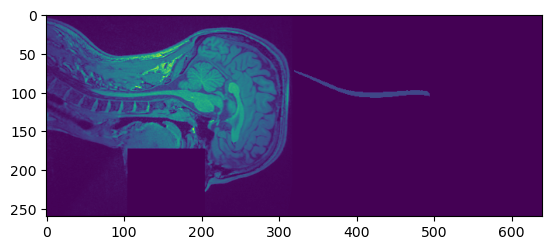

In [6]:
trans = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys)])

imgd = trans(filenames[0])
images = imgd['img']
labels = imgd['label']
plt.imshow(np.hstack((images[0, 100], labels[0, 100] * 200)))

In [7]:
print(f'Image shape: {images.shape}  Data keys: {list(imgd.keys())}')
print(f'Label shape: {labels.shape}  Data keys: {list(imgd.keys())}')

Image shape: (1, 192, 260, 320)  Data keys: ['img', 'label', 'img_meta_dict', 'label_meta_dict']
Label shape: (1, 192, 260, 320)  Data keys: ['img', 'label', 'img_meta_dict', 'label_meta_dict']


**Image shape: (summary of tensor and metadata?, voxel slice, rows, columns)**

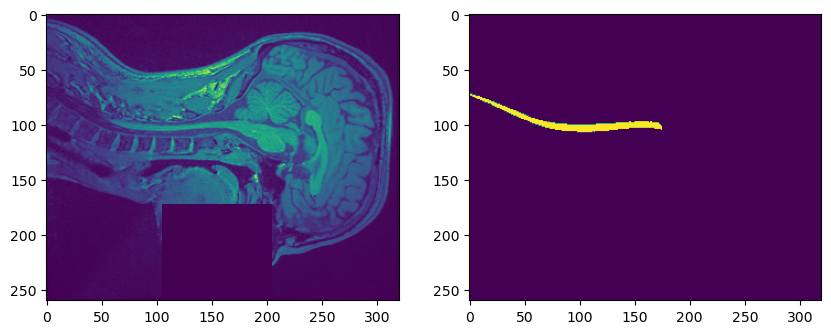

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(images[0, 100])
plt.subplot(122)
plt.imshow(labels[0, 100])
plt.show()

In [9]:
a = np.array(labels[0, 100]) 
a[a > 0] = 500
b = np.array(images[0, 100])
sum = np.add(a, b)

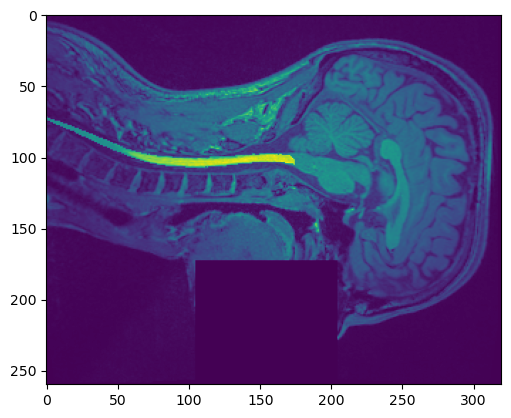

In [10]:
plt.figure
plt.imshow(sum)
plt.show()

# Create dataset

In [11]:
transform = Compose([LoadImaged(fn_keys), AddChanneld(fn_keys), ToTensord(fn_keys)])

ds = Dataset(filenames, transform)

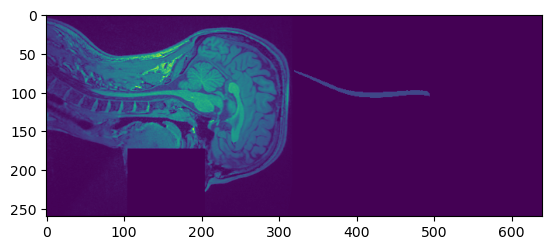

In [12]:
item = ds[0]
im, lab = item['img'], item['label']
plt.imshow(np.hstack([im.numpy()[0, 100], lab.numpy()[0, 100] * 200]))

In [13]:
print(f'Image shape: {im.shape} \n Label shape: {lab.shape}')

Image shape: (1, 192, 260, 320) 
 Label shape: (1, 192, 260, 320)


# Create dataloader

In [14]:
loader = DataLoader(ds, batch_size=10, num_workers=5,)

In [ ]:
# batch = next(iter(loader))

In [15]:
batch = first(loader)
print(list(batch.keys()), batch["img"].shape)

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\ProgramData\Miniconda3\lib\site-packages\monai\data\utils.py", line 464, in list_data_collate
    ret[key] = collate_meta_tensor(data_for_batch)
  File "c:\ProgramData\Miniconda3\lib\site-packages\monai\data\utils.py", line 429, in collate_meta_tensor
    collated = default_collate(batch)
  File "c:\ProgramData\Miniconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
  File "c:\ProgramData\Miniconda3\lib\site-packages\monai\data\meta_tensor.py", line 249, in __torch_function__
    ret = super().__torch_function__(func, types, args, kwargs)
  File "c:\ProgramData\Miniconda3\lib\site-packages\torch\tensor.py", line 995, in __torch_function__
    ret = func(*args, **kwargs)
RuntimeError: stack expects each tensor to be equal size, but got [1, 192, 260, 320] at entry 0 and [1, 64, 320, 320] at entry 1

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\ProgramData\Miniconda3\lib\site-packages\torch\utils\data\_utils\worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "c:\ProgramData\Miniconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "c:\ProgramData\Miniconda3\lib\site-packages\monai\data\utils.py", line 479, in list_data_collate
    raise RuntimeError(re_str) from re
RuntimeError: stack expects each tensor to be equal size, but got [1, 192, 260, 320] at entry 0 and [1, 64, 320, 320] at entry 1
Collate error on the key 'img' of dictionary data.

MONAI hint: if your transforms intentionally create images of different shapes, creating your `DataLoader` with `collate_fn=pad_list_data_collate` might solve this problem (check its documentation).


In [ ]:
f, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].imshow(np.hstack(batch["img"][:, 0, 64]))
ax[1].imshow(np.hstack(batch["seg"][:, 0, 64]))